3.9.16 (main, Jan 11 2023, 16:16:36) [MSC v.1916 64 bit (AMD64)]
Epoch 1/3
1875/1875 - 10s - loss: 0.8314 - accuracy: 0.7443 - val_loss: 0.6195 - val_accuracy: 0.8258 - 10s/epoch - 5ms/step
Epoch 2/3
1875/1875 - 9s - loss: 0.5252 - accuracy: 0.8523 - val_loss: 0.4431 - val_accuracy: 0.8773 - 9s/epoch - 5ms/step
Epoch 3/3
1875/1875 - 8s - loss: 0.3926 - accuracy: 0.8898 - val_loss: 0.3405 - val_accuracy: 0.9035 - 8s/epoch - 4ms/step


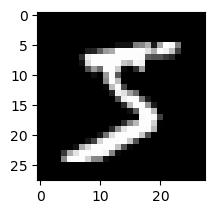

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import sys
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K 


print(sys.version)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap="gray")

K.set_image_data_format("channels_first")
seed = 7
np.random.seed(seed)

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype("float32")

X_train = X_train / 255
X_test = X_test / 255 

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_train.shape[1]

def baseline_model():
    model = Sequential()
    model.add(Conv2D(8, (3,3), input_shape = (1,28,28), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(4, activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    return model

model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=3, batch_size=32, verbose=2)

model.save('model.h5')

scores = model.evaluate(X_test, y_test, verbose=0)

              


In [12]:
print("CNN error: %.2f" % (100 - scores[1] * 100))

CNN error: 6.39


In [ ]:
from PIL import Image
from keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in np.random.randint(0, 10000+1, 10):
    arr2im = Image.fromarray(X_train[i])
    arr2im.save("{}.png".format(i), "PNG")
    